# <center> <u><font size = 24, color="#7B241C"> Logistic Regression 02 </u> 

In [1]:
##=================================================================
##              Importing Necessary Modules
##=================================================================

import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import glm

%matplotlib inline

In [2]:
##=================================================================
##             Reading the data
##=================================================================

churn = pd.read_csv('churn.csv')
churn.head()

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


In [3]:
##=================================================================
##      Building length of relationship logistic model
##=================================================================

len_relationship_mdl = glm("has_churned ~ time_since_first_purchase", data = churn,
                       family = sm.families.Binomial()).fit()
print("="*80)
print("The Length Relationship Logistic Model Results".center(80))
print("="*80, end="\n\n")
print(len_relationship_mdl.summary())
print(end="\n\n\n")
##=================================================================
##      Building length of recency logistic model
##=================================================================
recency_model = glm("has_churned ~ time_since_last_purchase", 
                   data = churn,
                   family = sm.families.Binomial()).fit()

print("="*80)
print("The Recency Relationship Logistic Model Results".center(80))
print("="*80, end="\n\n")
print(recency_model.summary())

                 The Length Relationship Logistic Model Results                 

                 Generalized Linear Model Regression Results                  
Dep. Variable:            has_churned   No. Observations:                  400
Model:                            GLM   Df Residuals:                      398
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -271.87
Date:                Fri, 31 Dec 2021   Deviance:                       543.73
Time:                        21:15:10   Pearson chi2:                     400.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02661
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

# Prediction with Logistic Regression

  - Making prediction with a logistic model is the same as  prediction for linear models. We follow the next steps:
  - Create a DataFrame of new explanatory variable values. 
  - Calculat the response values using the `predict()` method.
  - Use `assign()` method to combine new explanatory variable data with the predicted values
  
**Here is the syntax**:

```python
## Create the new data
new_exp_data = pd.DataFrame({"explanatory-var-name": [array of values]})

## Create the predicted data
pred_data = new_exp_data.assign(
    response_var = fitted_model.predict(new_exp_data))
```






12. All predictions together
Here are all the values calculated in the prediction dataset. Some column names are abbreviated for better printing.

13. Comparing scales
Each way of describing responses has different benefits. Most likely outcome is easiest to understand because the answer is always yes or no, but this lacks precision. Probabilities and odds ratios are still fairly easy to understand for a data literate audience. However, the non-linear predictions make it hard to reason about how changes in the explanatory variable will change the response. Log odds ratio is difficult to interpret for individual values, but the linear relationship with the explanatory variables makes it easy to reason about changes.

In [4]:
##=================================================================
##            Create Predicted data
##=================================================================

new_explanatory_data = pd.DataFrame(
    {"time_since_last_purchase": np.arange(-1, 6.50, 0.25)})

# Create predicted data
predicted_data = new_explanatory_data.assign(
    has_churned = recency_model.predict(new_explanatory_data))

## Print the head of data
predicted_data.head()

,time_since_last_purchase,has_churned
0,-1.00,0.424523
1,-0.75,0.441043
2,-0.50,0.457695
3,-0.25,0.474441
4,0.00,0.491246


## Visualizing Predicted Data

- we can add prediction data points on top of the plot of the original data to get a clear view of our predictions.  

- In order to achieve this, we use:
    - `sns.regplot()` with logistic set to True
    - `sns.scatterplot()` to plot the predicted data points

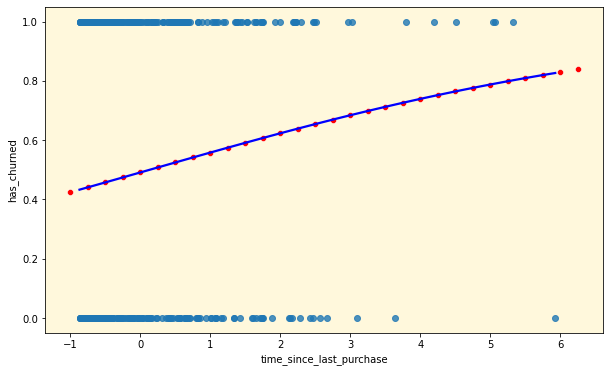

In [5]:
##=================================================================
##            Visualize the Predicted data
##=================================================================
plt.rcParams['axes.facecolor']= "#FFF8DC"
plt.rcParams['figure.figsize'] = (10, 6)
sns.regplot(x="time_since_last_purchase",
            y="has_churned",
            data= churn, 
            logistic=True,
           ci = None,
           line_kws={"color": "blue"})

sns.scatterplot(x="time_since_last_purchase",
            y="has_churned",
            data= predicted_data, 
            ci = None,
            color = "red")


plt.show()

## Classifying the Outcome Based on a Cutoff

- The main reason of logistic regression to classify cases. The simplest method we can do is:
    - Set a **cutoff**, a **50%** for example (because our model generates probabilities)
    - Round the probabilities using `np.round()` function.
    - If the probability is greater than the **cutoff** we predict **1**
    - If the probability is less than the **cutoff** we predict **0**

- In our example: 
  - If the probability of churning is less than 0.5, we predict no-churn.
  - If probability is greater then 0.5, we predict churn.

## Visualizing Data Based on Cutoff

  - Plotting your results gives a clear picture to you. 

In [6]:
## Calculate the most like outcome
## -------------------------------

predicted_data["most_likely_outcome"] = np.round(predicted_data['has_churned'])

# Print the head of predicted_data
predicted_data.head()

,time_since_last_purchase,has_churned,most_likely_outcome
0,-1.00,0.424523,0.0
1,-0.75,0.441043,0.0
2,-0.50,0.457695,0.0
3,-0.25,0.474441,0.0
4,0.00,0.491246,0.0


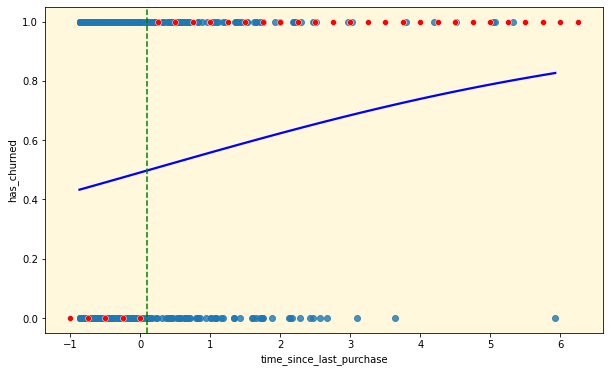

In [15]:
## Visualize the classified Outcome
## ---------------------------------

plt.rcParams['axes.facecolor']= "#FFF8DC"
plt.rcParams['figure.figsize'] = (10, 6)
sns.regplot(x="time_since_last_purchase",
            y="has_churned",
            data= churn, 
            logistic=True,
            ci = None,
            line_kws={"color": "blue"})
 
sns.scatterplot(x="time_since_last_purchase",
            y="most_likely_outcome",
            data= predicted_data, 
            color = "red")
plt.axvline(x = 0.1, linestyle = 'dashed', color = "green")

plt.show()

## Odds Ratio

### Calculating odds ratio

- Recall that the odds ratio  is the probability that something happens, divided by the probability that it doesn't.

or 
$$odds\_ratio = \frac{P(x)}{1- P(x)}$$

- Recall as well: 
  - The baseline of odds_ratio is 1.
  - If odds ratio is less than 1, then the event won't happen
  - If odds ratio is greater than 1, the event does happen.
  
### Visualizing The Odds Ratio

- Plotting the odds ratio against the explanatory variable and check against the baseline of 1 to see when the event happens and when it doesn't, in our example:
    - In the bottom-left, the predictions are below one, so the **chance of churning is less than the chance of not churning**.
    -  In the top-right, the **chance of churning is greater than the chance of not churning**.

- Plotting can done using `seaborn.lineplot()` function

- Adding a baseline is achieved using `plt.axhline()` function.

In [8]:
## Calculate the odds ratio
## --------------------------
predicted_data['odds_ratio'] = (predicted_data['has_churned'] / 
                (1 - predicted_data["has_churned"]))
## Note that I am using parentheses () so I can break the code into lines

# print the head of data
predicted_data.head()

,time_since_last_purchase,has_churned,most_likely_outcome,odds_ratio
0,-1.00,0.424523,0.0,0.737688
1,-0.75,0.441043,0.0,0.789046
2,-0.50,0.457695,0.0,0.843980
3,-0.25,0.474441,0.0,0.902738
4,0.00,0.491246,0.0,0.965587


## Visualizing Odds Ratio

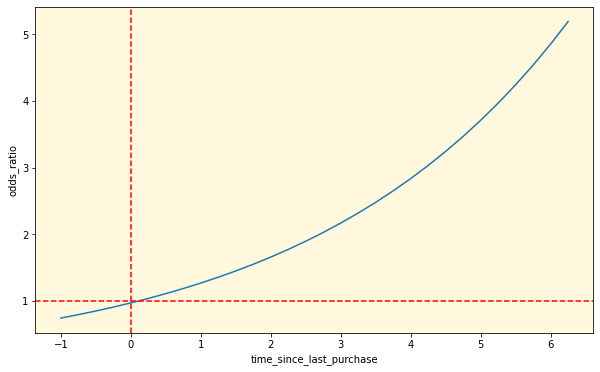

In [9]:
sns.lineplot(x = "time_since_last_purchase",
            y = 'odds_ratio',
            data = predicted_data)

plt.axhline(y = 1, linestyle = 'dashed', color = "red")
plt.axvline(x = 0, linestyle = 'dashed', color = "red")
plt.show()

## Visualizing Log Odds (Logit)

- Recall from the theory lecture, the log odds is called **logit**. Also, recall that log odds transforms the relationship into linear. 

- In this section we calculate the log-odds-ratio by using `np.log()` function

- We also visualize the log-odds against the explanatory variable.

### Note:
- We can use `plt.yscale()` and pass the log as an option to plot the log odds

In [10]:
## Calculate the log odds ratio
## --------------------------
predicted_data['log_odds_ratio'] = np.log(predicted_data['odds_ratio'])

# Print the head of the data
predicted_data.head()

,time_since_last_purchase,has_churned,most_likely_outcome,odds_ratio,log_odds_ratio
0,-1.00,0.424523,0.0,0.737688,-0.304234
1,-0.75,0.441043,0.0,0.789046,-0.236931
2,-0.50,0.457695,0.0,0.843980,-0.169627
3,-0.25,0.474441,0.0,0.902738,-0.102323
4,0.00,0.491246,0.0,0.965587,-0.035019


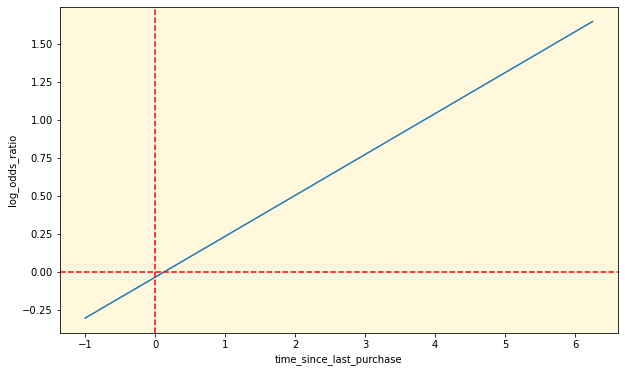

In [11]:
## Visualize the log odds ratio
## -----------------------------

sns.lineplot(x = "time_since_last_purchase",
            y = 'log_odds_ratio',
            data = predicted_data)
plt.axhline(y = 0, linestyle = 'dashed', color = "red")
plt.axvline(x = 0, linestyle = 'dashed', color = "red")
plt.show()

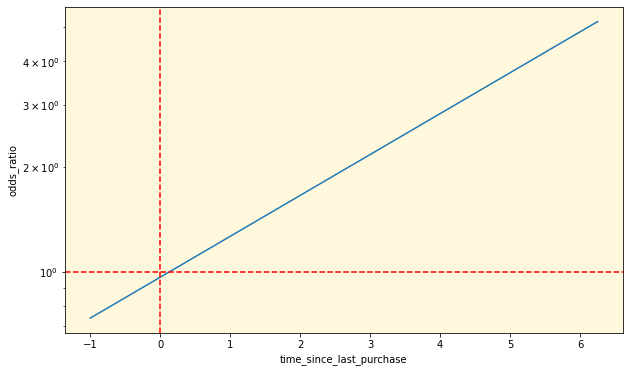

In [12]:
## Use yscale('log') to plot the log odds ratio
## ---------------------------------------------

sns.lineplot(x = "time_since_last_purchase",
            y = 'odds_ratio',
            data = predicted_data)
plt.axhline(y = 1, linestyle = 'dashed', color = "red")
plt.axvline(x = 0, linestyle = 'dashed', color = "red")
plt.yscale('log')
plt.show()

## Final Results:

- At this stage, we print the first and last 5 observations of the predicted data to see the difference between all values, probabilities, odds ratio, log odds ratio, and the classified outcome.

In [13]:
print("="*80)
print("The first five observation of the predicted Data ".center(80))
print("="*80, end="\n\n")
print(predicted_data.head())
print(end="\n\n\n")

print("="*80)
print("The last five observation of the predicted Data ".center(80))
print("="*80, end="\n\n")
print(predicted_data.tail())
print(end="\n\n\n")

               The first five observation of the predicted Data                 

   time_since_last_purchase  has_churned  most_likely_outcome  odds_ratio  \
0                     -1.00     0.424523                  0.0    0.737688   
1                     -0.75     0.441043                  0.0    0.789046   
2                     -0.50     0.457695                  0.0    0.843980   
3                     -0.25     0.474441                  0.0    0.902738   
4                      0.00     0.491246                  0.0    0.965587   

   log_odds_ratio  
0       -0.304234  
1       -0.236931  
2       -0.169627  
3       -0.102323  
4       -0.035019  



                The last five observation of the predicted Data                 

    time_since_last_purchase  has_churned  most_likely_outcome  odds_ratio  \
25                      5.25     0.798727                  1.0    3.968384   
26                      5.50     0.809330                  1.0    4.244665   
27              

---
## Practice with Length of Relationship Logistic Model

In [ ]:
## Setting Plots confifuration
plt.rcParams['axes.facecolor']= "#F5F5DC"
plt.figure(figsize = (8, 6))

## New Explanatory Variable Data 
new_exp_data = pd.DataFrame({
    'time_since_first_purchase': np.arange(-1.50, 4, .25)})

## Create pred_data using assign()

pred_data = 

# Print the head


In [ ]:
# Create a scatter plot with logistic trend line
sns.regplot(
    x = ,
    y= ,
    data = ,
    ci = ,
    logistic =
)

# Overlay with pred_data, colored red

sns.scatterplot(x =,
            y=,
            data= ,
            color = )
plt.show()

In [ ]:
# Add most_likely_outcome to pred_data
pred_data["most_likely_outcome"] = 

# Print the head


In [ ]:
# Create a scatter plot with logistic trend line
sns.regplot(
    x =,
    y= ,
    data = ,
    ci = ,
    logistic = True
)

# Overlay with pred_data, colored red

sns.scatterplot(x=,
            y=,
            data= ,
            color =)
plt.show()

In [ ]:
# Update pred_data with odds_ratio
prediction_data["odds_ratio"] = 

# Print the head


In [ ]:
# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x = ,
            y = ,
            data = )

# Add a dashed horizontal line at odds_ratio = 1
plt.axhline()

plt.show()

In [ ]:
# Update pred_data with log_odds_ratio
prediction_data['log_odds_ratio'] = 

# Print the head


In [ ]:
# Update pred_data with log_odds_ratio
prediction_data["log_odds_ratio"] = 

# Plot log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x=,
             y=,
             data=)

# Add a dashed horizontal line at log_odds_ratio = 0
plt.axhline()

plt.show()

In [ ]:
# Print 5 first and last values
#------------------------------
print("="*80)
print("The first five observation of the predicted Data ".center(80))
print("="*80, end="\n\n")
print(pred_data.head())
print(end="\n\n\n")

print("="*80)
print("The last five observation of the predicted Data ".center(80))
print("="*80, end="\n\n")
print(predict.tail())
print(end="\n\n\n")
